## Project Summary 
-- Your goal ifor this project if to create an Artificial Neural Network that will use the OPEN for the  Capital Markets and Volatility to predict the ClOSE for the 10 year Treasury (20 year tome frame)
-- Does these markes provide predictive insites on the the 10 Year Treasury Yield? 
-- How is the model impacted with the addition of Volitily, GOLD, OIL etc

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [425]:
capital_tickers = ["^GSPC","^DJI", "^IXIC","^RUT"]
## "CL=F", "GC=F","SI=F","EURUSD=X"

In [426]:
capital_data = pd.DataFrame()

In [427]:
for t in capital_tickers:
    capital_data[t] = web.DataReader(t, data_source="yahoo", start = "2000-1-1")["Open"]

In [428]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2000-01-03,1469.250000,11501.849609,4186.189941,504.760010
2000-01-04,1455.219971,11349.750000,4020.000000,497.049988
2000-01-05,1399.420044,10989.370117,3854.350098,478.380005
2000-01-06,1402.109985,11113.370117,3834.439941,478.829987
2000-01-07,1403.449951,11247.059570,3711.090088,475.339996
...,...,...,...,...
2020-10-12,3500.020020,28671.119141,11732.330078,1642.459961
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971


## Checking for missing Data
- Below we can see there is data missing from a few features so we ill need to take that into consideration when training our model

In [429]:
capital_data.isnull().sum()

^GSPC    0
^DJI     0
^IXIC    0
^RUT     1
dtype: int64

In [430]:
capital_data.corr()

,^GSPC,^DJI,^IXIC,^RUT
^GSPC,1.000000,0.991880,0.983121,0.956773
^DJI,0.991880,1.000000,0.967532,0.970487
^IXIC,0.983121,0.967532,1.000000,0.914880
^RUT,0.956773,0.970487,0.914880,1.000000


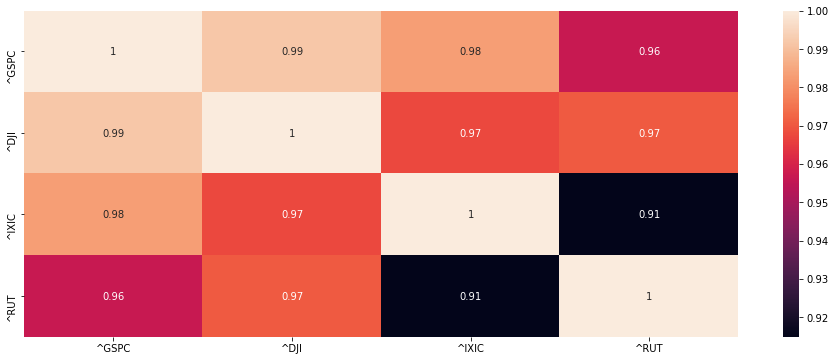

In [431]:
plt.figure(figsize=(16,6))
sns.heatmap(capital_data.corr(), annot=True)

## Putting the data Together
- Now that the data is ready the Capital Markets we need the close for the 10 Year

In [432]:
tenYearData = web.DataReader("^TNX", data_source="yahoo", start= "2001-1-1")["Adj Close"]

### Combining the Data 
- adding the 10 year ADJ Close data to the Capital Markets data set
- This will be our working Data

In [433]:
working_data = pd.concat([capital_data, tenYearData], axis=1)

In [434]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,Adj Close
Date,,,,,
2000-01-03,1469.250000,11501.849609,4186.189941,504.760010,NaN
2000-01-04,1455.219971,11349.750000,4020.000000,497.049988,NaN
2000-01-05,1399.420044,10989.370117,3854.350098,478.380005,NaN
2000-01-06,1402.109985,11113.370117,3834.439941,478.829987,NaN
2000-01-07,1403.449951,11247.059570,3711.090088,475.339996,NaN
...,...,...,...,...,...
2020-10-12,3500.020020,28671.119141,11732.330078,1642.459961,0.777
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946,0.727
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,0.722


### Analyzing the Data 
- Currently we see there is missing data we need to consider removing
- lets see how to go about this
- First lets fix the columns 

In [435]:
working_data.columns

Index(['^GSPC', '^DJI', '^IXIC', '^RUT', 'Adj Close'], dtype='object')

In [436]:
working_data.columns = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^TNX Adj Close']

### Handling missing data
- ^TNX has 288 days missing form the total 5232 days
- approximately 5% of the data so this is not siginificate to mak a huge diffference so will drop these days

In [437]:
working_data.isnull().sum()

^GSPC               0
^DJI                0
^IXIC               0
^RUT                1
^TNX Adj Close    288
dtype: int64

In [438]:
working_data.dropna(inplace=True)

In [439]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close
Date,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,4.917
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,5.097
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,5.013
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,4.948
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,4.897
...,...,...,...,...,...
2020-10-12,3500.020020,28671.119141,11732.330078,1642.459961,0.777
2020-10-13,3534.010010,28764.949219,11901.759766,1647.569946,0.727
2020-10-14,3515.469971,28731.300781,11889.070312,1637.969971,0.722


### 10 Year activity over time
- Since late 2009 ther has been a stedy decline in the 10 year yield

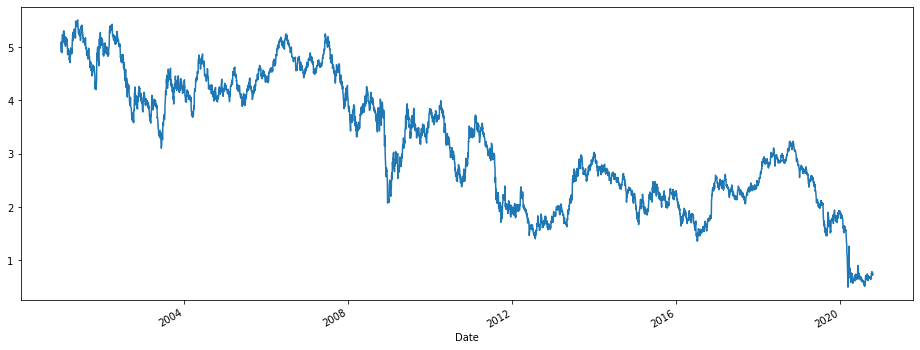

In [440]:
working_data["^TNX Adj Close"].plot(figsize = (16,6))

### Preparing the data for model
- Separating X - > Features and y - > Target (TNX)

In [441]:
X = working_data.drop("^TNX Adj Close", axis= 1).values
y = working_data["^TNX Adj Close"].values

### Training testing and splitting

In [442]:
from sklearn.model_selection import train_test_split

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data to a normal Distribution

In [444]:
from sklearn.preprocessing import MinMaxScaler

In [445]:
scalar = MinMaxScaler()

In [446]:
X_train = scalar.fit_transform(X_train)

In [447]:
X_test = scalar.transform(X_test)

### Early Stopping Callback
- Will use early stopping to prevent overtraining on the training data 

In [448]:
from tensorflow.keras.callbacks import EarlyStopping

In [449]:
stop = EarlyStopping("val_loss", mode="min", patience= 50)

## Creating the model

In [450]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [451]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))
model.compile(activation = 'adam', loss = "mse")

In [452]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[stop])

Train on 3460 samples, validate on 1483 samples
Epoch 1/300
3460/3460 [==============================] - 2s 671us/sample - loss: 8.2668 - val_loss: 5.7553
Epoch 2/300
3460/3460 [==============================] - 0s 131us/sample - loss: 3.6783 - val_loss: 2.8252
Epoch 3/300
3460/3460 [==============================] - 0s 131us/sample - loss: 2.0998 - val_loss: 1.6737
Epoch 4/300
3460/3460 [==============================] - 0s 131us/sample - loss: 1.2129 - val_loss: 0.8287
Epoch 5/300
3460/3460 [==============================] - 0s 131us/sample - loss: 0.7139 - val_loss: 0.6455
Epoch 6/300
3460/3460 [==============================] - 0s 131us/sample - loss: 0.6680 - val_loss: 0.6307
Epoch 7/300
3460/3460 [==============================] - 0s 136us/sample - loss: 0.6546 - val_loss: 0.6567
Epoch 8/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.6429 - val_loss: 0.6128
Epoch 9/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.6293 - val_lo

3460/3460 [==============================] - 0s 134us/sample - loss: 0.2189 - val_loss: 0.2355
Epoch 77/300
3460/3460 [==============================] - 0s 134us/sample - loss: 0.2185 - val_loss: 0.2545
Epoch 78/300
3460/3460 [==============================] - 0s 131us/sample - loss: 0.2184 - val_loss: 0.2148
Epoch 79/300
3460/3460 [==============================] - 0s 131us/sample - loss: 0.2181 - val_loss: 0.2741
Epoch 80/300
3460/3460 [==============================] - 0s 129us/sample - loss: 0.2191 - val_loss: 0.2063
Epoch 81/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2169 - val_loss: 0.2046
Epoch 82/300
3460/3460 [==============================] - 0s 131us/sample - loss: 0.2184 - val_loss: 0.2014
Epoch 83/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2173 - val_loss: 0.2374
Epoch 84/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2168 - val_loss: 0.2103
Epoch 85/300
3460/3460 [=================

3460/3460 [==============================] - 0s 132us/sample - loss: 0.2015 - val_loss: 0.2177
Epoch 152/300
3460/3460 [==============================] - 0s 129us/sample - loss: 0.1995 - val_loss: 0.2277
Epoch 153/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.2000 - val_loss: 0.2038
Epoch 154/300
3460/3460 [==============================] - 0s 131us/sample - loss: 0.1981 - val_loss: 0.1920
Epoch 155/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1981 - val_loss: 0.2128
Epoch 156/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1986 - val_loss: 0.2343
Epoch 157/300
3460/3460 [==============================] - 0s 129us/sample - loss: 0.1968 - val_loss: 0.1855
Epoch 158/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1983 - val_loss: 0.1903
Epoch 159/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1984 - val_loss: 0.2563
Epoch 160/300
3460/3460 [========

3460/3460 [==============================] - 0s 130us/sample - loss: 0.1769 - val_loss: 0.1668
Epoch 227/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1766 - val_loss: 0.1635
Epoch 228/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1770 - val_loss: 0.1822
Epoch 229/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1762 - val_loss: 0.2455
Epoch 230/300
3460/3460 [==============================] - 0s 129us/sample - loss: 0.1777 - val_loss: 0.2681
Epoch 231/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1757 - val_loss: 0.1727
Epoch 232/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1747 - val_loss: 0.1808
Epoch 233/300
3460/3460 [==============================] - 0s 129us/sample - loss: 0.1762 - val_loss: 0.1662
Epoch 234/300
3460/3460 [==============================] - 0s 130us/sample - loss: 0.1748 - val_loss: 0.1748
Epoch 235/300
3460/3460 [========

## Plot below shows that the model preformed really well 
- There is also a good about of room to keep training since we made it to all 300 epochs

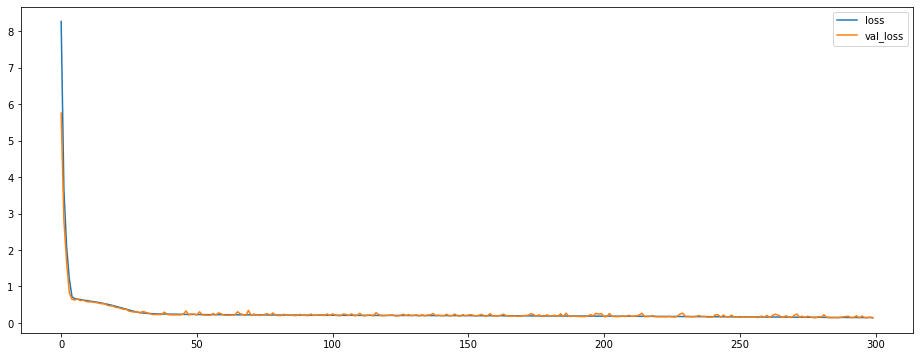

In [453]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Predictions 
- will use the model to make preditions on the Test data

In [454]:
predictions = model.predict(X_test)

### Metrics
- Will use sklearn metrics to test the prediction accuracy for the data

In [455]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [456]:
print(explained_variance_score(y_test, predictions))

0.9072172744673948


In [457]:
print(mean_absolute_error(y_test, predictions))

0.2941601111208838


In [458]:
print(mean_squared_error(y_test, predictions))

0.13670002846980003


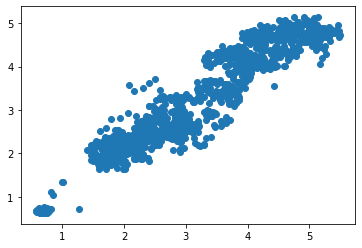

In [459]:
plt.scatter(y_test, predictions)

### Testing in random Data 

In [480]:
from random import randint
random_index = randint(1, len(working_data))
random_day = working_data.drop("^TNX Adj Close", axis=1).iloc[random_index]

In [481]:
random_day

^GSPC    1089.189941
^DJI     9939.339844
^IXIC    1910.040039
^RUT      540.750000
Name: 2004-05-21 00:00:00, dtype: float64

In [482]:
random_day = scalar.transform(random_day.values.reshape(1,4))

In [483]:
model.predict(random_day)

array([[4.375989]], dtype=float32)

In [484]:
working_data.iloc[random_index]

^GSPC             1089.189941
^DJI              9939.339844
^IXIC             1910.040039
^RUT               540.750000
^TNX Adj Close       4.764000
Name: 2004-05-21 00:00:00, dtype: float64